# 데이터 불러오기

In [2]:
#필요한 라이브러리 importi
import numpy as np
import pandas as pd

In [75]:
# 서울시 범죄 현황 데이터 불러오기
# encoding = euc-kr or cp949 적용
crime_anal_police = pd.read_csv('./data/02. crime_in_Seoul.csv', thousands=',',  encoding='euc-kr')

In [11]:
crime_anal_police.head()

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거
0,중부서,2,2,3,2,105,65,1395,477,1355,1170
1,종로서,3,3,6,5,115,98,1070,413,1278,1070
2,남대문서,1,0,6,4,65,46,1153,382,869,794
3,서대문서,2,2,5,4,154,124,1812,738,2056,1711
4,혜화서,3,2,5,4,96,63,1114,424,1015,861


In [16]:
# 크롤링하기 위해서 불러오는 라이브러리 import
from bs4 import BeautifulSoup
from urllib.request import urlopen
import pandas as pd

In [70]:
# 경찰서의 관서명과 주소 데이터를 가져온다 
url = "https://www.police.go.kr/user/bbs/BD_selectBbsList.do?q_bbsCode=1038&q_tab=1"
html = urlopen(url)
soup = BeautifulSoup(html, 'html.parser')

pol_list = [] 

# 웹사이트에 들어가서  데이터가 들어가있는 태그를 확인 (ctrl+shift+c) f12와 같다
pol_data = soup.find_all('tr')
# pol_data를 살펴봤던 첫 두줄은 테이블헤더와 서울경찰청 데이터므로 
# 2: 부터 시작 
for pol in pol_data[2:]:  
    name = pol.find_all('td')[0].text
    address = pol.find_all('td')[1].text.strip() 
    pol_list.append( [name,address] )

pol_list


[['서울강남경찰서', '서울시 강남구 테헤란로 114길 11'],
 ['서울강동경찰서', '서울시 강동구 성내로 57'],
 ['서울강북경찰서', '서울시 강북구 오패산로 406'],
 ['서울강서경찰서', '서울시 양천구 화곡로 73'],
 ['서울관악경찰서', '서울시 관악구 관악로5길 33'],
 ['서울광진경찰서', '서울시 광진구 자양로 167'],
 ['서울구로경찰서', '서울시 구로구 가마산로 235'],
 ['서울금천경찰서', '서울시 금천구 시흥대로73길 50'],
 ['서울남대문경찰서', '서울시 중구 한강대로 410'],
 ['서울노원경찰서', '서울시 노원구 노원로 283'],
 ['서울도봉경찰서', '서울시 도봉구 노해로 403'],
 ['서울동대문경찰서', '서울시 동대문구 약령시로21길 29'],
 ['서울동작경찰서', '서울시 동작구 노량진로 148'],
 ['서울마포경찰서', '서울시 마포구 마포대로 183'],
 ['서울방배경찰서', '서울시 서초구 동작대로 204'],
 ['서울서대문경찰서', '서울 서대문구 통일로 113'],
 ['서울서부경찰서', '서울시 은평구 진흥로 58'],
 ['서울서초경찰서', '서울시 서초구 반포대로 179'],
 ['서울성동경찰서', '서울시 성동구 왕십리광장로 9'],
 ['서울성북경찰서', '서울 성북구 보문로 170'],
 ['서울송파경찰서', '서울시 송파구 중대로 221'],
 ['서울수서경찰서', '서울시 강남구 개포로 617'],
 ['서울양천경찰서', '서울시 양천구 목동동로 99'],
 ['서울영등포경찰서', '서울시 영등포구 국회대로 608'],
 ['서울용산경찰서', '서울시 용산구 원효로89길 24'],
 ['서울은평경찰서', '서울시 은평구 연서로 365'],
 ['서울종로경찰서', '서울시 종로구 율곡로 46'],
 ['서울종암경찰서', '서울시 성북구 종암로 135'],
 ['서울중랑경찰서', '서울시 중랑구 신내역로3길 40-10'],
 ['서울중부경찰서', '서

In [50]:
#데이터 프레임으로 변환하기
pol_df = pd.DataFrame(pol_list, columns=['경찰서명', '주소'])

In [51]:
pol_df.head()

,경찰서명,주소
0,서울강남경찰서,서울시 강남구 테헤란로 114길 11
1,서울강동경찰서,서울시 강동구 성내로 57
2,서울강북경찰서,서울시 강북구 오패산로 406
3,서울강서경찰서,서울시 양천구 화곡로 73
4,서울관악경찰서,서울시 관악구 관악로5길 33


In [72]:
# 경찰서명, 주소, 관서명, 구별
# 경찰서명을 **서 형태로 만들고 주소를 **구만 남기기
'''
pol_list02 = list()
for i in pol_list:
    i[0] = i[0].replace('서울', '')
    i[0] = i[0].replace('경찰', '')
    i[1] = i[1][i[1].index(' '):i[1].index('구')] + '구'
    pol_list02.append(i)
    
print(pol_list02)
'''

[['강남서', ' 강남구'], ['강동서', ' 강동구'], ['강북서', ' 강북구'], ['강서서', ' 양천구'], ['관악서', ' 관악구'], ['광진서', ' 광진구'], ['구로서', ' 구'], ['금천서', ' 금천구'], ['남대문서', ' 중구'], ['노원서', ' 노원구'], ['도봉서', ' 도봉구'], ['동대문서', ' 동대문구'], ['동작서', ' 동작구'], ['마포서', ' 마포구'], ['방배서', ' 서초구'], ['서대문서', ' 서대문구'], ['서부서', ' 은평구'], ['서초서', ' 서초구'], ['성동서', ' 성동구'], ['성북서', ' 성북구'], ['송파서', ' 송파구'], ['수서서', ' 강남구'], ['양천서', ' 양천구'], ['영등포서', ' 영등포구'], ['용산서', ' 용산구'], ['은평서', ' 은평구'], ['종로서', ' 종로구'], ['종암서', ' 성북구'], ['중랑서', ' 중랑구'], ['중부서', ' 중구'], ['혜화서', ' 종로구']]


In [57]:
# 경찰서 - 관서 데이터 추가 => str()

pol_df['관서명'] = pol_df['경찰서명'].str[2:-3] + '서'

In [59]:
pol_df.head()

,경찰서명,주소,관서명
0,서울강남경찰서,서울시 강남구 테헤란로 114길 11,강남서
1,서울강동경찰서,서울시 강동구 성내로 57,강동서
2,서울강북경찰서,서울시 강북구 오패산로 406,강북서
3,서울강서경찰서,서울시 양천구 화곡로 73,강서서
4,서울관악경찰서,서울시 관악구 관악로5길 33,관악서


In [68]:
# 구별 데이터 추가 -lambda 사용해보기
pol_df['구별'] = pol_df['주소'].apply(lambda x: x.split(' ')[1])

In [69]:
pol_df

,경찰서명,주소,관서명,구별
0,서울강남경찰서,서울시 강남구 테헤란로 114길 11,강남서,강남구
1,서울강동경찰서,서울시 강동구 성내로 57,강동서,강동구
2,서울강북경찰서,서울시 강북구 오패산로 406,강북서,강북구
3,서울강서경찰서,서울시 양천구 화곡로 73,강서서,양천구
4,서울관악경찰서,서울시 관악구 관악로5길 33,관악서,관악구
5,서울광진경찰서,서울시 광진구 자양로 167,광진서,광진구
6,서울구로경찰서,서울시 구로구 가마산로 235,구로서,구로구
7,서울금천경찰서,서울시 금천구 시흥대로73길 50,금천서,금천구
8,서울남대문경찰서,서울시 중구 한강대로 410,남대문서,중구
9,서울노원경찰서,서울시 노원구 노원로 283,노원서,노원구


In [76]:
# merge = 지역구 기준
# 관서명과 구별 컬럼만 합체
crime_anal_police = pd.merge( crime_anal_police, pol_df[['관서명', '구별']], how='left', on='관서명')

In [77]:
crime_anal_police.head()

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,구별
0,중부서,2,2,3,2,105,65,1395,477,1355,1170,중구
1,종로서,3,3,6,5,115,98,1070,413,1278,1070,종로구
2,남대문서,1,0,6,4,65,46,1153,382,869,794,중구
3,서대문서,2,2,5,4,154,124,1812,738,2056,1711,서대문구
4,혜화서,3,2,5,4,96,63,1114,424,1015,861,종로구


In [78]:
crime_anal_police.to_csv('./data/crime_in_Seoul_include_guname.csv',
                        index=False, header=True, sep=',',
                        encoding='utf-8-sig')

# 범죄데이터 구별로 정리하기

## 1. 경찰서 관할 구역별로 범죄는 어떻게 발생되고 있는가?

In [123]:
crime_anal_police=pd.read_csv('./data/crime_in_Seoul_include_guname.csv')

In [124]:
crime_anal_police = pd.pivot_table(crime_anal_police, index='구별', aggfunc=np.sum)

In [125]:
df_crime

,강간 검거,강간 발생,강도 검거,강도 발생,살인 검거,살인 발생,절도 검거,절도 발생,폭력 검거,폭력 발생
구별,,,,,,,,,,
강남구,349,449,18,21,10,13,1650,3850,3705,4284
강동구,123,156,8,6,3,4,789,2366,2248,2712
강북구,126,153,13,14,8,7,618,1434,2348,2649
관악구,221,320,14,12,8,9,827,2706,2642,3298
광진구,220,240,26,14,4,4,1277,3026,2180,2625
구로구,164,281,11,15,6,8,889,2335,2432,3007
금천구,122,151,6,6,4,3,888,1567,1776,2054
노원구,121,197,7,7,10,10,801,2193,2329,2723
도봉구,106,102,10,9,3,3,478,1063,1303,1487


# 서울시 범죄를 비율로 분석하기

In [126]:
# 범죄 검거율 항목별로 비율을 계산하기
# 검거/발생*100

crime_anal_police['강간검거율'] = crime_anal_police['강간 검거']/crime_anal_police['강간 발생'] * 100
crime_anal_police['강도검거율'] = crime_anal_police['강도 검거']/crime_anal_police['강도 발생']* 100
crime_anal_police['살인검거율'] = crime_anal_police['살인 검거']/crime_anal_police['살인 발생']* 100
crime_anal_police['절도검거율'] = crime_anal_police['절도 검거']/crime_anal_police['절도 발생']* 100
crime_anal_police['폭력검거율'] = crime_anal_police['폭력 검거']/crime_anal_police['폭력 발생']* 100


In [127]:
crime_anal_police.head()

,강간 검거,강간 발생,강도 검거,강도 발생,살인 검거,살인 발생,절도 검거,절도 발생,폭력 검거,폭력 발생,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,,,,,,
강남구,349,449,18,21,10,13,1650,3850,3705,4284,77.728285,85.714286,76.923077,42.857143,86.484594
강동구,123,156,8,6,3,4,789,2366,2248,2712,78.846154,133.333333,75.000000,33.347422,82.890855
강북구,126,153,13,14,8,7,618,1434,2348,2649,82.352941,92.857143,114.285714,43.096234,88.637222
관악구,221,320,14,12,8,9,827,2706,2642,3298,69.062500,116.666667,88.888889,30.561715,80.109157
광진구,220,240,26,14,4,4,1277,3026,2180,2625,91.666667,185.714286,100.000000,42.200925,83.047619


- 추가) 서울시 지역별 범죄 발생은 어떻게 나타나는가?
- 추가) 서울시 지역별 범죄 발생율 대비 검거율은 어떤가?
- 추가) 강력 사건은 어떤 곳이 많이 발생하고 검거율은 어떤가?<br>
강력사건 : 강간+살인<br>
강력사건 발생 건수, 비율 = 추가 생성필요<br>
- 추가) 인구수 대비 범죄발생 비율은 어떤가?<br>
- 추가) 인구수, 지역별 강력범죄 발생 비율은 어떤가?<br>
- 검거율...

*** 날씨, 소득, 아파트 가격, 연령, 스타벅스, 공시지가, CCTV, 유흥시설, 

In [128]:
con_list = ['강간검거율', '강도검거율', '살인검거율', '절도검거율', '폭력검거율']

In [133]:
for column in con_list:
    crime_anal_police.loc[crime_anal_police[column] > 100, column] = 100

crime_anal_police

,강간 검거,강간 발생,강도 검거,강도 발생,살인 검거,살인 발생,절도 검거,절도 발생,폭력 검거,폭력 발생,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,,,,,,
강남구,349,449,18,21,10,13,1650,3850,3705,4284,77.728285,85.714286,76.923077,42.857143,86.484594
강동구,123,156,8,6,3,4,789,2366,2248,2712,78.846154,100.000000,75.000000,33.347422,82.890855
강북구,126,153,13,14,8,7,618,1434,2348,2649,82.352941,92.857143,100.000000,43.096234,88.637222
관악구,221,320,14,12,8,9,827,2706,2642,3298,69.062500,100.000000,88.888889,30.561715,80.109157
광진구,220,240,26,14,4,4,1277,3026,2180,2625,91.666667,100.000000,100.000000,42.200925,83.047619
구로구,164,281,11,15,6,8,889,2335,2432,3007,58.362989,73.333333,75.000000,38.072805,80.877951
금천구,122,151,6,6,4,3,888,1567,1776,2054,80.794702,100.000000,100.000000,56.668794,86.465433
노원구,121,197,7,7,10,10,801,2193,2329,2723,61.421320,100.000000,100.000000,36.525308,85.530665
도봉구,106,102,10,9,3,3,478,1063,1303,1487,100.000000,100.000000,100.000000,44.967074,87.626093


In [135]:
crime_anal_police.rename(columns = {'강간 발생': '강간',
                            '강도 발생': '강도',
                            '살인 발생': '살인',
                            '절도 발생': '절도',
                            '폭력 발생': '폭력'}, inplace=True)
crime_anal_police.head()

,강간 검거,강간,강도 검거,강도,살인 검거,살인,절도 검거,절도,폭력 검거,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,,,,,,
강남구,349,449,18,21,10,13,1650,3850,3705,4284,77.728285,85.714286,76.923077,42.857143,86.484594
강동구,123,156,8,6,3,4,789,2366,2248,2712,78.846154,100.000000,75.000000,33.347422,82.890855
강북구,126,153,13,14,8,7,618,1434,2348,2649,82.352941,92.857143,100.000000,43.096234,88.637222
관악구,221,320,14,12,8,9,827,2706,2642,3298,69.062500,100.000000,88.888889,30.561715,80.109157
광진구,220,240,26,14,4,4,1277,3026,2180,2625,91.666667,100.000000,100.000000,42.200925,83.047619


In [142]:
crime_anal_police.drop(['강간 검거', '강도 검거', '살인 검거', '절도 검거', '폭력 검거'], axis=1, inplace=True)

In [136]:
# 사이킷런 => 머신러닝을 위해서 사용하는 모율/라이브러리
from sklearn import preprocessing

In [143]:
# 정규화 : scale을 정규화하는 것 = normalization
# 범죄발생 절대건수를 비교하는 건 => 무리가 있다=> 정규화를 통해서 비교해주면 설명 가능

col = ['강간', '강도', '살인', '절도', '폭력']

x = crime_anal_police[col].values
min_max_scaler = preprocessing.MinMaxScaler()


In [145]:
x_scaled = min_max_scaler.fit_transform(x.astype(float))
crime_anal_norm = pd.DataFrame(x_scaled, columns = col, index=crime_anal_police.index)

col2 = ['강간검거율', '강도검거율', '살인검거율', '절도검거율', '폭력검거율']
crime_anal_norm[col2] = crime_anal_police[col2]
crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,0.953472,0.661386,77.728285,85.714286,76.923077,42.857143,86.484594
강동구,0.155620,0.058824,0.166667,0.445775,0.289667,78.846154,100.000000,75.000000,33.347422,82.890855
강북구,0.146974,0.529412,0.416667,0.126924,0.274769,82.352941,92.857143,100.000000,43.096234,88.637222
관악구,0.628242,0.411765,0.583333,0.562094,0.428234,69.062500,100.000000,88.888889,30.561715,80.109157
광진구,0.397695,0.529412,0.166667,0.671570,0.269094,91.666667,100.000000,100.000000,42.200925,83.047619


In [146]:
crime_anal_norm

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,0.953472,0.661386,77.728285,85.714286,76.923077,42.857143,86.484594
강동구,0.155620,0.058824,0.166667,0.445775,0.289667,78.846154,100.000000,75.000000,33.347422,82.890855
강북구,0.146974,0.529412,0.416667,0.126924,0.274769,82.352941,92.857143,100.000000,43.096234,88.637222
관악구,0.628242,0.411765,0.583333,0.562094,0.428234,69.062500,100.000000,88.888889,30.561715,80.109157
광진구,0.397695,0.529412,0.166667,0.671570,0.269094,91.666667,100.000000,100.000000,42.200925,83.047619
구로구,0.515850,0.588235,0.500000,0.435169,0.359423,58.362989,73.333333,75.000000,38.072805,80.877951
금천구,0.141210,0.058824,0.083333,0.172426,0.134074,80.794702,100.000000,100.000000,56.668794,86.465433
노원구,0.273775,0.117647,0.666667,0.386589,0.292268,61.421320,100.000000,100.000000,36.525308,85.530665
도봉구,0.000000,0.235294,0.083333,0.000000,0.000000,100.000000,100.000000,100.000000,44.967074,87.626093


In [151]:
result_CCTV = pd.read_csv('./data/01. CCTV_result.csv', index_col='구별')

In [153]:
result_CCTV.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217,0.487292,1388.055355
강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638,0.170552,465.422892
강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342,0.226535,329.342026
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794,0.146413,551.503155
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291,0.284673,162.948104


In [154]:
crime_anal_norm[['인구수', 'CCTV']] = result_CCTV[['인구수', '소계']]
crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV
구별,,,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,0.953472,0.661386,77.728285,85.714286,76.923077,42.857143,86.484594,570500.0,2780
강동구,0.155620,0.058824,0.166667,0.445775,0.289667,78.846154,100.000000,75.000000,33.347422,82.890855,453233.0,773
강북구,0.146974,0.529412,0.416667,0.126924,0.274769,82.352941,92.857143,100.000000,43.096234,88.637222,330192.0,748
관악구,0.628242,0.411765,0.583333,0.562094,0.428234,69.062500,100.000000,88.888889,30.561715,80.109157,525515.0,1496
광진구,0.397695,0.529412,0.166667,0.671570,0.269094,91.666667,100.000000,100.000000,42.200925,83.047619,372164.0,707


In [164]:
col = ['강간', '강도', '살인', '절도', '폭력']

crime_anal_norm['범죄'] = np.sum(crime_anal_norm[col], axis=1)
crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄
구별,,,,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,0.953472,0.661386,77.728285,85.714286,76.923077,42.857143,86.484594,570500.0,2780,4.472701
강동구,0.155620,0.058824,0.166667,0.445775,0.289667,78.846154,100.000000,75.000000,33.347422,82.890855,453233.0,773,1.116551
강북구,0.146974,0.529412,0.416667,0.126924,0.274769,82.352941,92.857143,100.000000,43.096234,88.637222,330192.0,748,1.494746
관악구,0.628242,0.411765,0.583333,0.562094,0.428234,69.062500,100.000000,88.888889,30.561715,80.109157,525515.0,1496,2.613667
광진구,0.397695,0.529412,0.166667,0.671570,0.269094,91.666667,100.000000,100.000000,42.200925,83.047619,372164.0,707,2.034438


In [166]:
col = ['강간검거율', '강도검거율', '살인검거율', '절도검거율', '폭력검거율']

In [167]:
crime_anal_norm['검거'] = np.sum(crime_anal_norm[col], axis=1)
crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄,검거
구별,,,,,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,0.953472,0.661386,77.728285,85.714286,76.923077,42.857143,86.484594,570500.0,2780,4.472701,369.707384
강동구,0.155620,0.058824,0.166667,0.445775,0.289667,78.846154,100.000000,75.000000,33.347422,82.890855,453233.0,773,1.116551,370.084431
강북구,0.146974,0.529412,0.416667,0.126924,0.274769,82.352941,92.857143,100.000000,43.096234,88.637222,330192.0,748,1.494746,406.943540
관악구,0.628242,0.411765,0.583333,0.562094,0.428234,69.062500,100.000000,88.888889,30.561715,80.109157,525515.0,1496,2.613667,368.622261
광진구,0.397695,0.529412,0.166667,0.671570,0.269094,91.666667,100.000000,100.000000,42.200925,83.047619,372164.0,707,2.034438,416.915211


1. 시각화를 위한 라이브러리 불러오기
2. 한글깨짐방지
3. 데이터의 상관관계를 분석하기 => 배운 방법 총동원
4. pairplot, heatmap, regplot으로 데이터 분석
5. folium 기법을 적용한 공간, 지리정보 분석 기법

In [168]:
# 시각화를 위한 라이브러리 불러오기
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [170]:
plt.rcParams['font.family'] = 'Malgun Gothic'

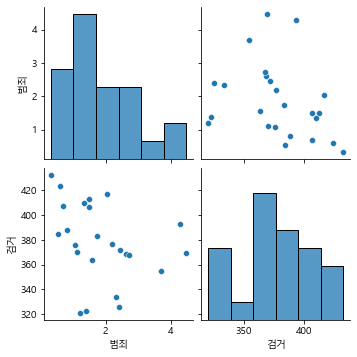

In [175]:
sns.pairplot(data=crime_anal_norm[['범죄', '검거']])

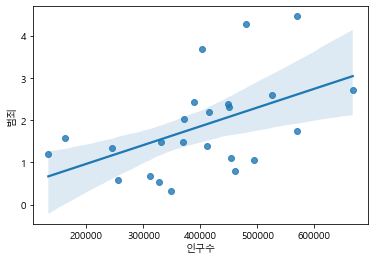

In [174]:
# 인구수와 범죄
sns.regplot(x='인구수', y='범죄', data=crime_anal_norm);

<AxesSubplot:ylabel='구별'>

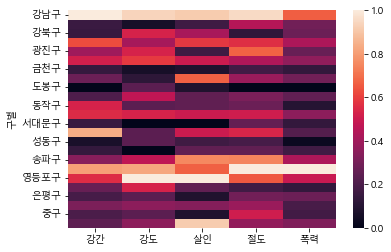

In [179]:
col = ['강간', '강도', '살인', '절도', '폭력']
sns.heatmap(data=crime_anal_norm[col])

In [182]:
# 검거율과 인구당 CCTV 비율의 상관관계?
# 인구당 CCTV 비율
crime_anal_norm['1인당CCTV'] = crime_anal_norm['CCTV']/crime_anal_norm['인구수'] * 100

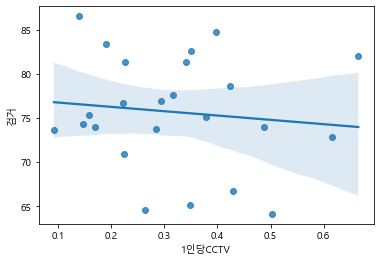

In [186]:
sns.regplot(x=crime_anal_norm['1인당CCTV'], y=crime_anal_norm['검거']/5);